In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import requests
import pickle

from config import ALL, TW0050, Tech, Fin

pd.set_option('display.max_columns', None)

In [2]:

stock_period = ('2010/01/01','2021/12/31')

# experiments
# Portfolio = ALL
Portfolio = TW0050


In [32]:
stock_df=[]
for stock in Portfolio['portfolio']: 
    try:
        print(f'Start Download {stock}')
        df = pdr.DataReader(str(stock)+'.TW', 'yahoo', start=stock_period[0], end=stock_period[1])
        df[stock] = df['Adj Close']
        df['date'] = df.index
        stock_df.append(df[['date',stock]])
    except:
        print(f'  {stock} Download Fail')
    
df = pd.concat(stock_df,axis=1).drop(columns='date')
df.index = df.index.to_series().apply(lambda x : str(x).replace('-','')[:8])
df.index.name = 'DateTime'
name = Portfolio['name']
df = df.dropna()
output_path = os.path.join('data',f'{name}.csv')
print(output_path)
df.to_csv(output_path)
df


Start Download 1101
Start Download 1216
Start Download 1301
Start Download 1303
Start Download 1326
Start Download 1402
Start Download 1590
Start Download 2002
Start Download 2207
Start Download 2303
Start Download 2308
Start Download 2317
Start Download 2324
Start Download 2327
Start Download 2330
Start Download 2357
Start Download 2379
Start Download 2382
Start Download 2395
Start Download 2408
Start Download 2409
Start Download 2412
Start Download 2603
Start Download 2609
Start Download 2615
Start Download 2801
Start Download 2880
Start Download 2881
Start Download 2882
Start Download 2884
Start Download 2885
Start Download 2886
Start Download 2887
Start Download 2891
Start Download 2892
Start Download 2912
Start Download 3008
Start Download 3034
Start Download 3045
Start Download 4904
Start Download 4938
Start Download 5880
Start Download 6415
Start Download 6505
Start Download 8046
Start Download 8454
Start Download 9910
data\TW0050.csv


,1101,1216,1301,1303,1326,1402,1590,2002,2207,2303,2308,2317,2324,2327,2330,2357,2379,2382,2395,2408,2409,2412,2603,2609,2615,2801,2880,2881,2882,2884,2885,2886,2887,2891,2892,2912,3008,3034,3045,4904,4938,5880,6415,6505,8046,8454,9910
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20140227,22.179382,32.798714,51.435349,41.028736,51.098503,20.793091,256.414795,17.947668,282.791290,8.401973,126.542496,57.358017,12.507073,27.830412,82.955589,152.615601,63.696301,44.006958,114.304123,30.585342,7.065485,62.496277,13.276932,21.765425,7.423028,10.925937,9.349975,25.492638,28.027988,7.684923,9.896029,14.706611,7.892887,10.957612,8.650025,136.476868,1126.979980,76.028748,59.064663,45.337418,23.731689,8.999995,45.368744,56.802372,30.348742,102.469368,37.756481
20140303,21.880898,32.377392,50.767345,40.586205,50.369465,20.793091,274.169769,17.877834,275.949524,8.538589,125.415993,56.743469,12.507073,27.830412,82.955589,151.044937,61.714634,43.711613,113.408775,29.750027,6.962587,62.292477,13.018769,21.430571,7.475489,10.925937,9.242505,25.251856,27.714472,7.604242,9.647071,14.524298,7.809803,10.789465,8.626064,134.299042,1156.306641,79.857544,58.027294,45.042061,23.789997,8.890239,48.497620,56.145267,29.688986,97.740005,38.499718
20140304,21.352819,32.215340,50.299767,40.522987,49.839264,20.466667,290.686035,17.738163,272.148560,8.470280,122.412033,56.538620,12.263033,27.543827,82.571541,150.783173,60.865349,43.534405,113.408775,27.693871,6.893991,62.020760,12.871248,21.179432,7.423028,10.833864,9.215636,25.041170,27.306908,7.543730,9.522593,14.402758,7.726722,10.761439,8.554180,135.024963,1156.306641,76.028748,57.767960,44.746700,23.585915,8.862800,51.822056,55.853222,29.853926,94.897133,38.202419
20140305,21.857937,32.409798,50.433361,40.649426,49.574158,20.531954,284.905365,17.703247,277.850006,8.504435,127.293480,56.675186,12.293537,28.021465,84.491814,148.165390,62.917786,46.546951,113.110344,25.766220,6.928290,62.428345,12.945008,21.263145,7.501717,10.803173,9.242505,25.131464,27.338261,7.584071,9.647071,14.402758,7.782112,10.817490,8.578142,136.476868,1164.685791,76.849205,57.962460,44.746700,24.081535,8.862800,55.439827,55.926239,30.018864,94.587120,38.797009
20140306,21.651300,32.798714,50.433361,40.459770,49.110233,20.629875,282.427887,17.842916,282.031036,8.675206,128.795471,57.631157,12.385054,28.244368,86.796127,148.950714,64.757912,46.487888,116.094772,27.051319,6.996888,62.700066,13.203172,21.430571,7.449258,10.833864,9.323107,25.281952,27.902584,7.523559,9.647071,14.493911,7.837498,11.041687,8.673986,143.736267,1164.685791,76.849205,58.156967,44.746700,24.198160,8.917677,59.253147,55.926239,30.060101,93.536133,38.598816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211224,42.397678,65.799995,96.066978,77.906830,75.664787,27.534645,984.000000,32.029072,590.258911,60.387222,264.195984,98.898117,22.156298,456.054504,597.776123,321.285278,564.000000,83.439713,387.355499,70.791016,20.958307,111.421654,115.940102,97.576302,157.093079,16.750000,20.950001,70.754051,56.797180,25.547266,23.390558,35.500000,18.750000,24.472069,22.827532,265.816345,2367.433838,439.168060,95.826485,61.397892,63.556366,25.049999,1193.578491,92.907516,547.414490,1339.570679,222.200287
20211227,42.574707,65.703941,96.528839,77.906830,75.947113,27.629921,1025.000000,31.758787,595.097107,60.387222,269.079468,99.373589,22.248425,464.250000,599.755493,323.456116,576.000000,84.269501,388.331207,71.632652,21.191696,111.903999,116.357147,97.576302,157.093079,16.799999,20.950001,70.754051,56.983097,25.547266,23.390558,35.599998,18.750000,24.424732,22.874695,265.332153,2372.275146,439.996704,95.922501,61.493977,63.833908,25.000000,1250.770752,93.195450,556.103638,1351.711792,223.665344
20211228,42.618961,65.992111,96.990700,77.997520,76.229446,27.772835,1025.000000,31.893932,595.097107,60.762878,271.032837,1

In [76]:

slope_df = df
slope_df[df.index>='2020/01/01']
slope_df = slope_df.reset_index(drop=True)
slopes = slope_df.apply(lambda x: np.polyfit(slope_df.index, x, 1)[0])
slopes

1101    0.012215
1216    0.020011
1301    0.025327
1303    0.016849
1326    0.018167
1402    0.004203
1590    0.380456
2002    0.005087
2207    0.168410
2303    0.018280
2308    0.050980
2317    0.010379
2324    0.002944
2327    0.270447
2330    0.249313
2357    0.042582
2379    0.226528
2382    0.014988
2395    0.108118
2408    0.021256
2409    0.003751
2412    0.023175
2603    0.025376
2609    0.015111
2615    0.037029
2801    0.004304
2880    0.006014
2881    0.011992
2882    0.007700
2884    0.009440
2885    0.006719
2886    0.009931
2887    0.004080
2891    0.005361
2892    0.007291
2912    0.070376
3008    0.655919
3034    0.145768
3045    0.017382
4904    0.005490
4938    0.008574
5880    0.007482
6415    0.385650
6505    0.024089
8046    0.137470
8454    0.377997
9910    0.081849
dtype: float64

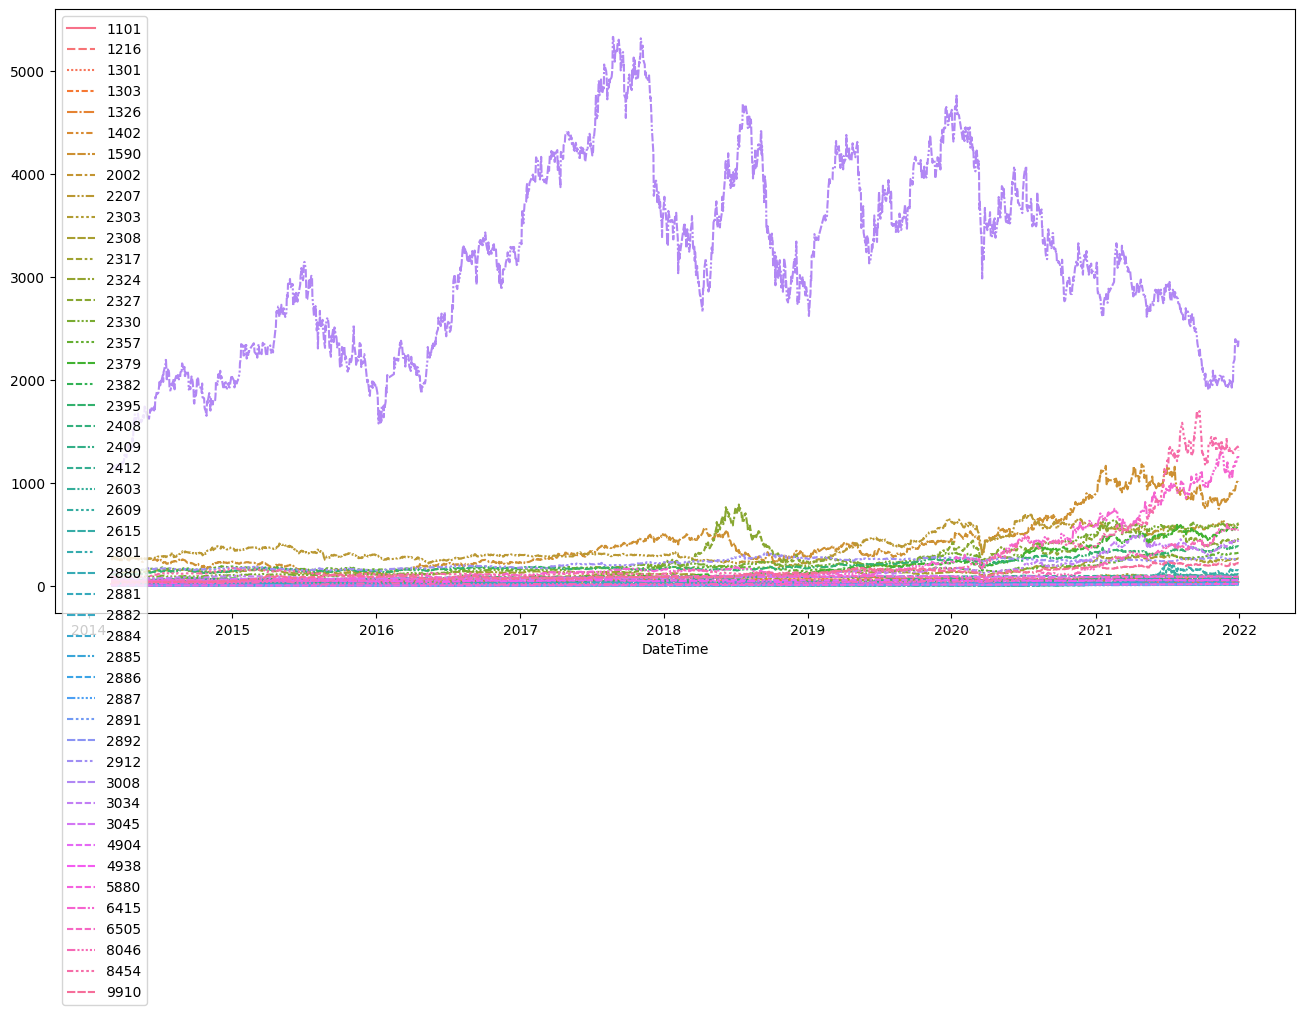

In [62]:
df = pd.read_csv(f'data/{name}.csv',index_col=0) 
df.index = pd.to_datetime(df.index,format='%Y%m%d')
fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=100)
sns.lineplot(data=df, ax=ax)
plt.legend(loc='upper left')

In [13]:

name = Portfolio['name']
print(name)
train_year = ('2010','2020')
test_year = ('2021','2021')
data = pd.read_csv(f'data/{name}.csv',index_col=0)

data = pd.DataFrame(data, index=data.index, columns=data.columns)
display(data.head())
display(data.describe())

scalerfile = f'scaler/{name}_{train_year[0]}_{train_year[1]}_scaler.sav'
print(scalerfile)
scaler_ = StandardScaler()
scaler = scaler_.fit(data)
pickle.dump(scaler, open(scalerfile, 'wb'))
scaler = pickle.load(open(scalerfile, 'rb'))

# portfolio_stock = []
# data = data[portfolio_stock]

train = data.loc[f'{train_year[0]}0101':f'{train_year[1]}1231']
output_path = f'data/{name}_{train_year[0]}_{train_year[1]}.csv'
print('Train Data:',output_path)
train.to_csv(output_path)
test = data.loc[f'{test_year[0]}0101':f'{test_year[1]}1231']
output_path = f'data/{name}_{test_year[0]}_{test_year[1]}.csv'
print('Test Data:',output_path)
test.to_csv(output_path)

TW0050


,1101,1216,1301,1303,1326,1402,1590,2002,2207,2303,2308,2317,2324,2327,2330,2357,2379,2382,2395,2408,2409,2412,2603,2609,2615,2801,2880,2881,2882,2884,2885,2886,2887,2891,2892,2912,3008,3034,3045,4904,4938,5880,6415,6505,8046,8454,9910
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20140227,22.179379,32.798710,51.435352,41.028736,51.098503,20.793093,256.414825,17.947668,282.791290,8.401971,126.542503,57.358021,12.507072,27.830410,82.955589,152.615601,63.696304,44.006962,114.304123,30.585337,7.065484,62.496273,13.276931,21.765425,7.423027,10.925935,9.349974,25.492638,28.027990,7.684922,9.896027,14.706614,7.892888,10.957611,8.650024,136.476868,1126.979980,76.028740,59.064648,45.337418,23.731686,8.999994,45.368740,56.802372,30.348736,102.469368,37.756481
20140303,21.880899,32.377388,50.767357,40.586205,50.369461,20.793093,274.169769,17.877836,275.949524,8.538589,125.415985,56.743469,12.507072,27.830410,82.955589,151.044952,61.714642,43.711613,113.408783,29.750025,6.962589,62.292473,13.018770,21.430571,7.475488,10.925935,9.242504,25.251858,27.714478,7.604242,9.647071,14.524296,7.809804,10.789464,8.626064,134.299072,1156.306885,79.857536,58.027298,45.042057,23.789993,8.890237,48.497620,56.145271,29.688986,97.740013,38.499718
20140304,21.352819,32.215336,50.299767,40.522991,49.839256,20.466667,290.686005,17.738159,272.148590,8.470279,122.412025,56.538620,12.263032,27.543827,82.571541,150.783142,60.865341,43.534401,113.408783,27.693867,6.893991,62.020763,12.871249,21.179432,7.423027,10.833863,9.215635,25.041176,27.306911,7.543729,9.522592,14.402756,7.726720,10.761440,8.554181,135.024979,1156.306885,76.028740,57.767948,44.746704,23.585917,8.862799,51.822060,55.853222,29.853926,94.897141,38.202419
20140305,21.857937,32.409801,50.433365,40.649429,49.574158,20.531952,284.905304,17.703245,277.849976,8.504435,127.293480,56.675190,12.293537,28.021467,84.491806,148.165421,62.917793,46.546959,113.110336,25.766222,6.928291,62.428349,12.945009,21.263145,7.501717,10.803172,9.242504,25.131466,27.338259,7.584072,9.647071,14.402756,7.782111,10.817489,8.578142,136.476868,1164.685913,76.849197,57.962467,44.746704,24.081541,8.862799,55.439827,55.926239,30.018866,94.587105,38.797016
20140306,21.651300,32.798710,50.433365,40.459770,49.110229,20.629877,282.427917,17.842915,282.031097,8.675206,128.795471,57.631153,12.385053,28.244366,86.796127,148.950714,64.757912,46.487892,116.094803,27.051321,6.996887,62.700069,13.203172,21.430571,7.449257,10.833863,9.323107,25.281956,27.902584,7.523559,9.647071,14.493909,7.837497,11.041687,8.673986,143.736282,1164.685913,76.849197,58.156967,44.746704,24.198156,8.917678,59.253147,55.926239,30.060099,93.536140,38.598820


,1101,1216,1301,1303,1326,1402,1590,2002,2207,2303,2308,2317,2324,2327,2330,2357,2379,2382,2395,2408,2409,2412,2603,2609,2615,2801,2880,2881,2882,2884,2885,2886,2887,2891,2892,2912,3008,3034,3045,4904,4938,5880,6415,6505,8046,8454,9910
count,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000
mean,25.322176,52.849049,70.979773,54.771250,68.291366,22.746719,412.131387,20.130494,379.808952,16.960155,152.763040,79.901045,15.302400,222.013883,243.120055,186.649970,177.871079,50.339754,206.544992,50.329077,10.356132,87.567441,20.671793,20.323986,24.994932,14.454348,13.807467,36.714195,36.498536,14.327490,12.727876,21.233365,10.462962,15.479165,14.223091,223.578850,3123.604025,143.651163,84.763050,56.699288,50.721775,13.782642,248.410226,81.393156,81.958793,268.050278,117.048692
std,8.005636,11.980613,15.829416,11.102572,14.741207,3.342505,257.423827,4.396338,131.487777,14.470330,50.180511,16.009393,2.567298,181.562097,156.148766,41.875414,147.141595,12.326683,68.022079,16.719687,3.780432,13.212892,27.786172,25.843486,39.409150,2.784851,3.517112,10.419577,6.688470,5.478153,4.451423,5.850650,2.627641,3.249648,4.156528,44.889642,920.077369,105.295657,10.783040,4.386100,9.588259,4.344356,277.466334,17.905142,119.971922,327.075544,49.918966
min,13.161243,32.215336,43.468632,35.689030,42.511726,16.210199,117.641838,12.787984,181.391830,7.403851,89.203415,56.065594,10.399903,25.728800,82.571541,129.299179,37.590927,31.445774,111.916565,21.040552,5.624089,62.020763,7.445694,3.767640,7.396798,9.864017,8.784603,22.921038,23.732931,7.261345,7.066118,13.058629,6.291360,9.586377,8.434423,134.299072,1126.979980,62.420105,57.767948,42.528816,23.585917,8.308673,44.781143,48.051933,18.678085,89.600258,37.756481
25%,19.317814,42.147438,54.055344,44.415077,53.317425,20.238171,228.679123,17.875017,283.922424,9.282439,125.040497,68.213058,13.656173,55.870472,118.983215,163.978134,76.368156,41.944431,161.454697,35.732601,8.122165,77.266212,9.789394,7.152940,10.666224,11.859891,10.370950,31.823700,32.748169,9.600849,9.615952,16.125830,8.242999,12.471203,9.872051,177.884140,2329.208252,78.940987,75.246361,54.772503,44.141483,9.655871,89.948509,62.217472,25.012432,117.114517,84.545685
50%,22.012436,54.314182,71.707916,55.326038,70.346840,22.221333,319.317810,19.312067,317.105072,11.094829,137.781693,74.719894,14.609107,195.570419,198.838898,174.041992,100.599480,46.885849,178.632324,49.602970,9.552921,89.902222,11.200708,11.585903,11.747766,13.814152,12.976392,34.656525,35.762390,12.153749,10.686979,18.973955,10.373379,15.894513,14.152721,233.630951,3115.053223,95.008621,86.874229,57.040344,52.173683,12.885245,135.642487,86.176735,33.812458,131.662643,99.497833
75%,31.166327,64.455177,83.787880,61.490082,78.117043,25.293146,489.085419,20.512182,496.484863,13.856698,150.909378,89.899330,15.961329,359.625580,284.108917,185.686340,220.952805,52.397869,247.173126,63.399418,10.717754,98.453911,13.571976,20.760868,14.487120,16.631327,17.262869,37.443745,38.768326,20.343910,15.345713,26.658697,11.863780,17.520088,18.346018,264.363800,3834.518066,157.414902,92.943550,59.623508,56.710869,18.143818,242.993423,95.415375,48.437546,178.889450,156.204895
max,46.052097,71.691376,108.999069,84.164772,105.130508,30.898657,1184.116943,40.218784,696.771362,65.740364,309.839020,123.004158,24.115488,793.674133,654.600647,329.245026,597.282043,87.312050,390.770477,94.206955,30.748093,112.386345,183.278625,172.451172,239.872574,21.652365,21.250000,76.587502,58.563381,25.638668

scaler/TW0050_2010_2020_scaler.sav
Train Data: data/TW0050_2010_2020.csv
Test Data: data/TW0050_2021_2021.csv


In [14]:
# portfolio_stock


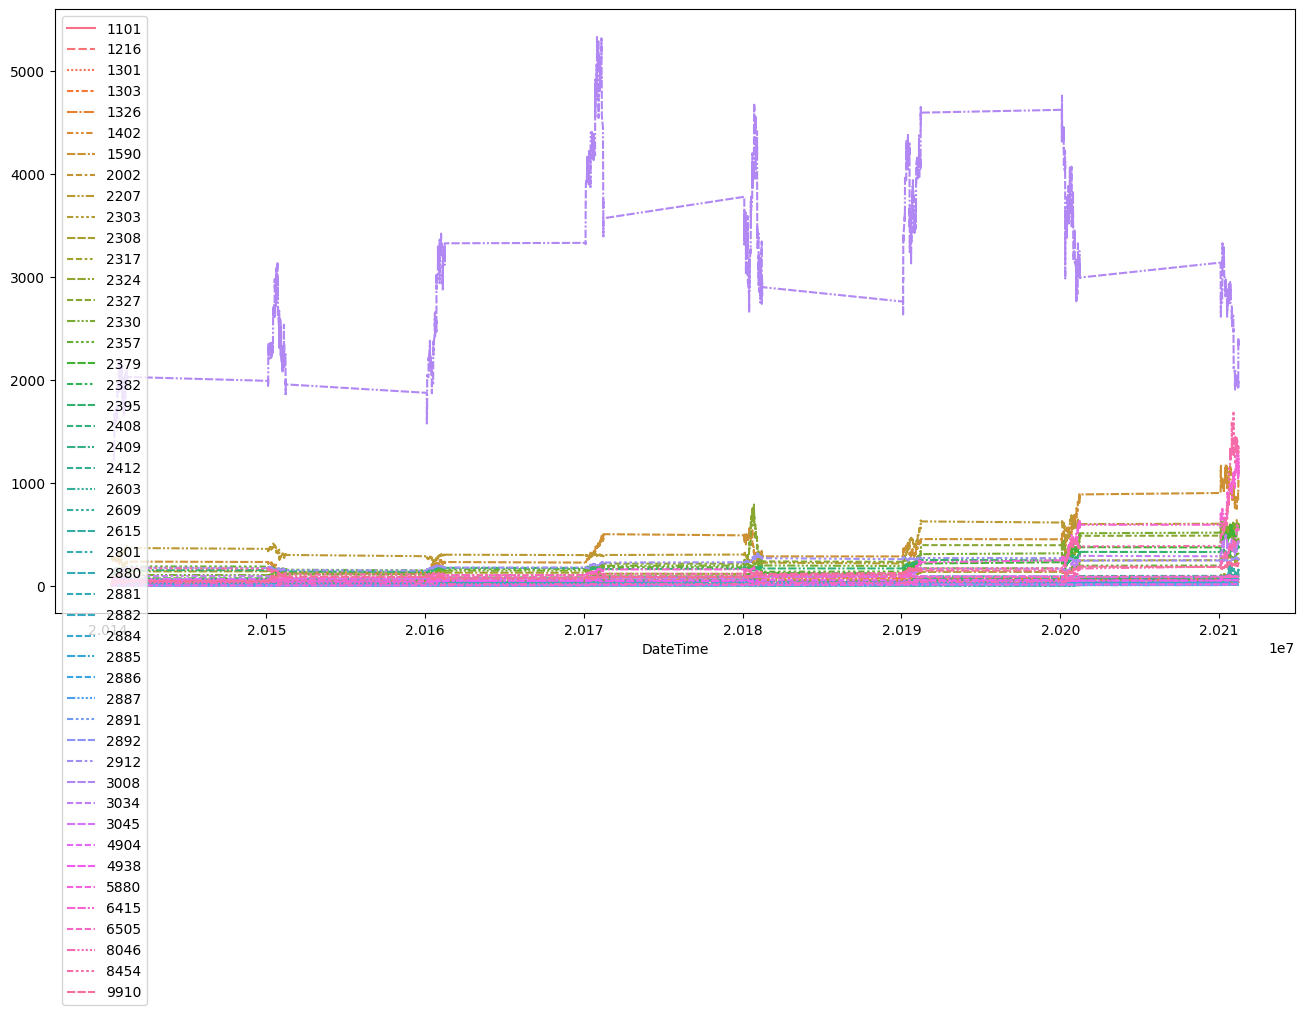

In [15]:

portfolio_stock = Portfolio['portfolio']
# portfolio_stock = ['1101','1216']
data_plot = data[portfolio_stock]
fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=100)
sns.lineplot(data=data_plot, ax=ax)
plt.legend(loc='upper left')

In [16]:
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {"dataset": "TaiwanStockInfo"}
translation = requests.get(url, params=parameter)
trans = translation.json()
df_info = pd.DataFrame(trans['data'])
drop_list = ['ETF', '上櫃指數股票型基金(ETF)','受益證券', '指數投資證券(ETN)', '其他', '所有證券 ', '存託憑證','Index', '大盤']
df_info = df_info[df_info['industry_category'].apply(lambda x : x not in drop_list)]
df_info['row'] = df_info.sort_values(['stock_id','industry_category'], ascending=[True,False]).groupby(['stock_id']).cumcount() + 1
df_info = df_info[df_info['row']==1]
df_info = df_info[['stock_id','stock_name','industry_category']]
df_info = df_info.rename(columns={'stock_id':'code','stock_name':'name','industry_category':'c_name'})
df_info = df_info[df_info['code'].apply(lambda x : x in Portfolio['portfolio'])]
df_info.to_csv(f'data/{name}_table.csv',index=False)
df_info

,code,name,c_name
304,1101,台泥,水泥工業
318,1216,統一,食品工業
340,1301,台塑,塑膠工業
341,1303,南亞,塑膠工業
360,1326,台化,塑膠工業
368,1402,遠東新,紡織纖維
469,1590,亞德客-KY,電機機械
598,2002,中鋼,鋼鐵工業
651,2207,和泰車,汽車工業
673,2303,聯電,電子工業


In [29]:

df = pdr.DataReader(str(3008)+'.TW', 'yahoo', start=stock_period[0], end=stock_period[1])
sns.lineplot(data = df[['Close','Adj Close']])

<AxesSubplot:xlabel='Date', ylabel='3008'>

ValueError: Date ordinal -995217.8500000001 converts to -755-03-09T03:35:59.999984 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<AxesSubplot:xlabel='DateTime', ylabel='3008'>

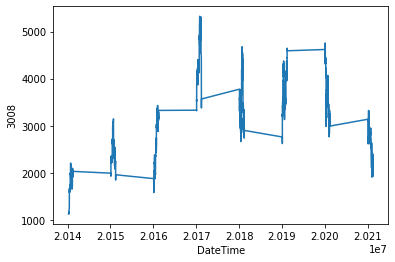

In [25]:
sns.lineplot(data = data_plot['3008'])

In [28]:
display(data_plot['3008'])
display(df[df.index>='2014/02/27'])

DateTime
20140227    1126.979980
20140303    1156.306885
20140304    1156.306885
20140305    1164.685913
20140306    1164.685913
               ...     
20211224    2367.433838
20211227    2372.274902
20211228    2328.702637
20211229    2328.702637
20211230    2386.799072
Name: 3008, Length: 1921, dtype: float64

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-02-27,1405.0,1320.0,1320.0,1345.0,2251000.0,1126.979980
2014-03-03,1390.0,1345.0,1380.0,1380.0,1206000.0,1156.306641
2014-03-04,1400.0,1365.0,1385.0,1380.0,901000.0,1156.306641
2014-03-05,1445.0,1385.0,1410.0,1390.0,1223000.0,1164.685791
2014-03-06,1415.0,1380.0,1390.0,1390.0,871000.0,1164.685791
...,...,...,...,...,...,...
2021-12-24,2500.0,2435.0,2470.0,2445.0,826743.0,2367.433838
2021-12-27,2500.0,2430.0,2455.0,2450.0,963871.0,2372.274902
2021-12-28,2475.0,2400.0,2475.0,2405.0,943528.0,2328.702637
